In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import numpy as np
from obspy import read, read_inventory
%matplotlib inline

In [2]:
client = Client("IRIS")

In [3]:
starttime = UTCDateTime("2019-01-01T00:00:00")
endtime = UTCDateTime("2020-01-01T00:00:00")

In [4]:
cat = client.get_events(starttime=starttime, endtime=endtime,minlatitude=-57,
                        minmagnitude=5, maxlatitude=-18, minlongitude=-81.5, maxlongitude=-68.5)

In [5]:
cat

57 Event(s) in Catalog:
2019-12-09T05:04:14.578000Z | -32.082,  -70.403 | 5.1 Mww
2019-12-03T08:46:36.374000Z | -18.560,  -70.650 | 6.0 Mww
...
2019-01-20T01:32:51.850000Z | -30.071,  -71.420 | 6.7 mww
2019-01-07T13:43:29.330000Z | -19.570,  -68.929 | 5.0 Mww
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [7]:
event_time=[]
for i in range(len(cat)):
    event_time.append(cat[i].origins[0].time)

In [8]:
cat[55].origins[0]

Origin
	   resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=36733336")
	          time: UTCDateTime(2019, 1, 20, 1, 32, 51, 850000)
	     longitude: -71.4202
	      latitude: -30.071
	         depth: 54820.0
	 creation_info: CreationInfo(author='at,pt,us')

In [9]:
event_time[55]

2019-01-20T01:32:51.850000Z

----------------------------------

In [10]:
inv = read_inventory("fdsn-station_2021-04-06T02_24_59.xml")

In [60]:
for i in inv[0][0]:
    print(i)

Channel 'BH1', Location '00' 
	Time range: 2014-08-04T00:00:00.000000Z - --
	Latitude: -29.01, Longitude: -70.70, Elevation: 2274.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 20.00 Hz
	Sensor (Description): None (Streckeisen STS-1VBB w/E300)
	Response information available
Channel 'BH2', Location '00' 
	Time range: 2014-08-04T00:00:00.000000Z - --
	Latitude: -29.01, Longitude: -70.70, Elevation: 2274.0 m, Local Depth: 0.0 m
	Azimuth: 90.00 degrees from north, clockwise
	Dip: 0.00 degrees down from horizontal
	Channel types: CONTINUOUS, GEOPHYSICAL
	Sampling Rate: 20.00 Hz
	Sensor (Description): None (Streckeisen STS-1VBB w/E300)
	Response information available
Channel 'BHZ', Location '00' 
	Time range: 2014-08-04T00:00:00.000000Z - --
	Latitude: -29.01, Longitude: -70.70, Elevation: 2274.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00

In [90]:
inv[0][0][0].__dir__()

['_location_code',
 '_latitude',
 '_longitude',
 '_elevation',
 '_depth',
 '_azimuth',
 '_dip',
 '_water_level',
 'types',
 'external_references',
 '_sample_rate',
 'sample_rate_ratio_number_samples',
 'sample_rate_ratio_number_seconds',
 '_clock_drift_in_seconds_per_sample',
 'calibration_units',
 'calibration_units_description',
 'sensor',
 'pre_amplifier',
 'data_logger',
 '_equipments',
 'response',
 '_code',
 'comments',
 'description',
 'start_date',
 'end_date',
 'restricted_status',
 '_alternate_code',
 '_historical_code',
 'data_availability',
 '_identifiers',
 '_source_id',
 '__module__',
 '__doc__',
 '__init__',
 'storage_format',
 'equipment',
 '__str__',
 '_repr_pretty_',
 'location_code',
 'longitude',
 'latitude',
 'elevation',
 'depth',
 'azimuth',
 'dip',
 'water_level',
 'sample_rate',
 'clock_drift_in_seconds_per_sample',
 'equipments',
 'plot',
 'code',
 'source_id',
 'identifiers',
 'alternate_code',
 'historical_code',
 'copy',
 'is_active',
 '__eq__',
 '__ne__',


In [91]:
inv[0][0][0].latitude

-29.011

In [11]:
inv_C = read_inventory("fdsn-station_2021-04-06T03_29_23.xml")

In [12]:
inv_C1 = read_inventory("fdsn-station_2021-04-06T03_58_38.xml")

---------------------------------------

In [13]:
E_lon=cat[55].origins[0].longitude

In [14]:
E_lat=cat[55].origins[0].latitude

In [15]:
for i in range(17):
    print(inv_C[0][i].longitude,inv_C[0][i].latitude)

-73.8853 -38.411999
-72.077797 -36.603001
-72.788399 -36.131302
-70.2994 -33.3377
-69.1942 -19.6685
-69.5904 -25.1626
-70.2347 -27.5937
-70.7993 -30.1727
-71.9303 -35.0099
-71.472 -39.5839
-73.6644 -43.1142
-72.5566 -48.4648
-72.338097 -51.270699
-71.049797 -53.154598
-70.2075 -33.8476
-71.0156 -32.9756
-70.6428 -33.4404


In [16]:
C_lon=inv_C[0][1].longitude

In [17]:
C_lat=inv_C[0][1].latitude

In [18]:
L_lon=inv[0][0].longitude

In [19]:
L_lat=inv[0][0].latitude

----------------------

In [20]:
t = UTCDateTime(event_time[55])

In [21]:
st_LCO = client.get_waveforms("IU", "LCO", "*", "BH*",t,t+5*60)

In [22]:
st_C = client.get_waveforms("C", "*", "", "BH*",t,t + 5*60)

In [23]:
st_C1 = client.get_waveforms("C", "*", "", "BH*",t,t + 5*60)

In [24]:
st_LCO_Z=st_LCO.select(component="Z")

In [25]:
st_C_Z=st_C.select(component="Z")

In [26]:
st_C1_Z=st_C1.select(component="Z")

-----------------------------------

In [27]:
tr= st_LCO_Z[0].copy()
pre_filt = [0.001, 0.005, 45, 50]
tr.remove_response(inventory=inv, pre_filt=pre_filt, output="DISP") 
tr.detrend()
tr.filter('highpass', freq=1.0, corners=2, zerophase=True)
tr.data=tr.data*1000
tr.slice(starttime=t+21.58,endtime=t+24.58);
Pd = max(abs(tr.data))

In [28]:
tr= st_LCO_Z[0].copy()
pre_filt = [0.001, 0.005, 45, 50]
tr.remove_response(inventory=inv, pre_filt=pre_filt, output="VEL") 
tr.detrend()
tr.filter('highpass', freq=1.0, corners=2, zerophase=True)
tr.data=tr.data*1000
tr.slice(starttime=t+21.58,endtime=t+24.58);
PGV_true = max(abs(tr.data))

In [29]:
PGV_cal=10**(0.920*np.log10(Pd) +1.642)

In [30]:
print(f"真實PGV為 {PGV_true}")
print(f"Pd為 {Pd}")
print(f"理論PGV為 {10**(0.920*np.log10(Pd) +1.642)}")
print(f"真實intensity為 {int(round(2.14*np.log10(PGV_true)+1.89))}")
print(f"理論intensity為 {int(round(2.14*np.log10(PGV_cal)+1.89))}")

真實PGV為 7.865237016805592
Pd為 0.7195596407351704
理論PGV為 32.3967506004117
真實intensity為 4
理論intensity為 5


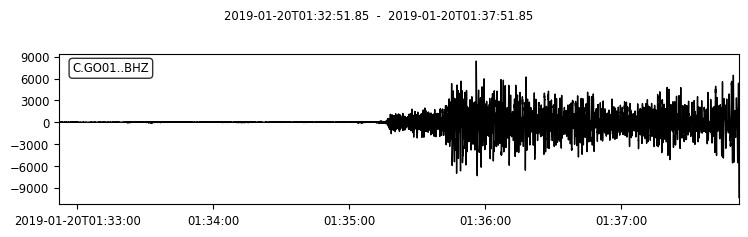

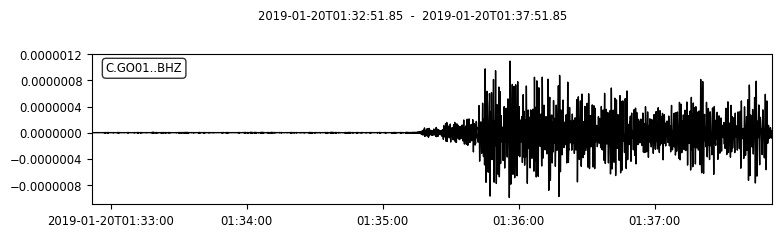

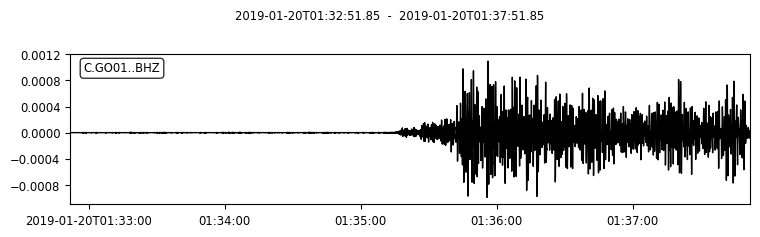

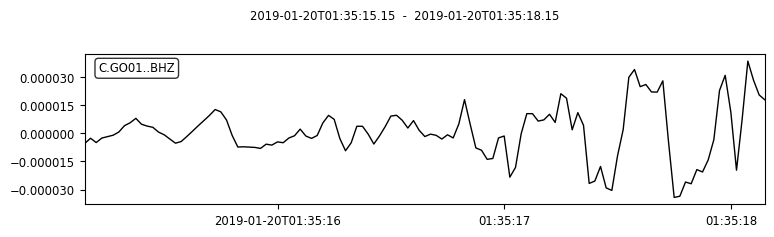

In [31]:
tr= st_C_Z[0].copy()

tr.detrend()
tr.filter('highpass', freq=1.0, corners=2, zerophase=True)
tr.plot();
pre_filt = [0.001, 0.005, 45, 50]
tr.remove_response(inventory=inv_C, pre_filt=pre_filt, output="DISP") 
tr.filter('highpass', freq=1.0, corners=2, zerophase=True)
tr.plot();
tr.data=tr.data*1000
tr.plot();
tr.plot(starttime=t+143.3,endtime=t+146.3);
tr.slice(starttime=t+143.3,endtime=t+146.3);
Pd = max(abs(tr.data))

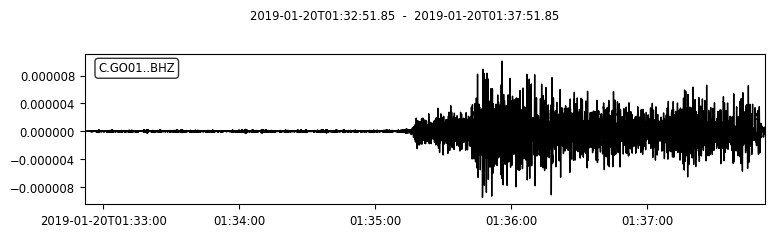

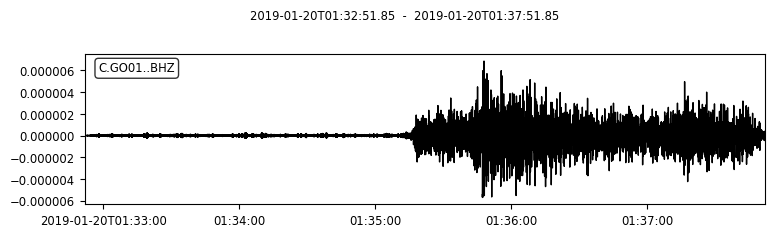

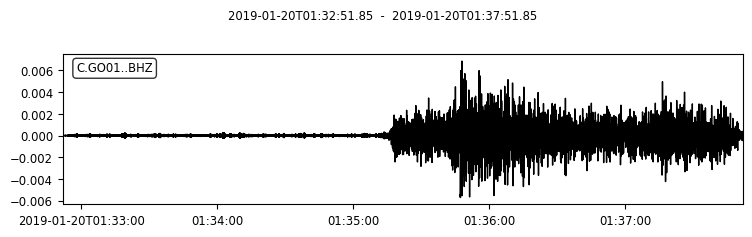

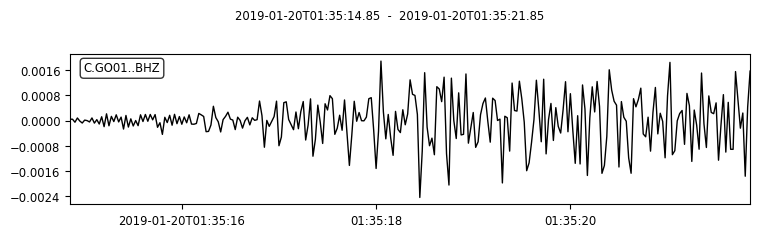

In [32]:
tr= st_C[2].copy()

tr.detrend()

tr.filter('highpass', freq=1.5, corners=2, zerophase=True)
pre_filt = [0.001, 0.005, 45, 50]
tr.remove_response(inventory=inv_C, pre_filt=pre_filt, output="VEL") 


tr.plot();

tr.filter('highpass', freq=2, corners=2, zerophase=True)
tr.plot();
tr.data=tr.data*1000
tr.plot();
tr.plot(starttime=t+143,endtime=t+150);
tr.slice(starttime=t+143,endtime=t+150)
PGV_true = max(abs(tr.data))

In [33]:
print(f"真實PGV為 {PGV_true}")
print(f"Pd為 {Pd}")
print(f"理論PGV為 {10**(0.920*np.log10(Pd) +1.642)}")
print(f"真實intensity為 {int(round(2.14*np.log10(PGV_true)+1.89))}")
print(f"理論intensity為 {int(round(2.14*np.log10(10**(0.920*np.log10(Pd) +1.642))+1.89))}")

真實PGV為 0.006855618354124744
Pd為 0.001096118391854231
理論PGV為 0.08292182803693886
真實intensity為 -3
理論intensity為 0


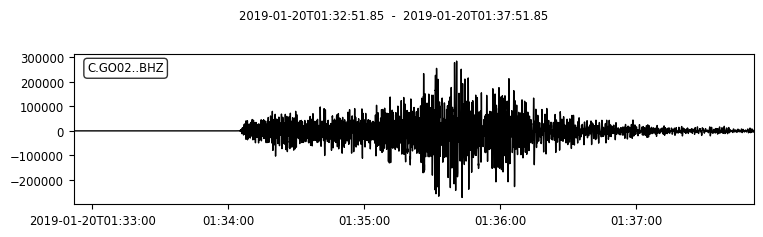

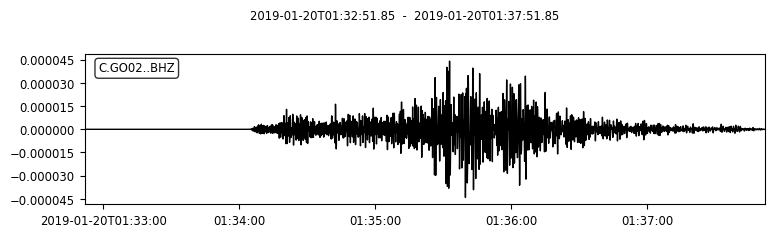

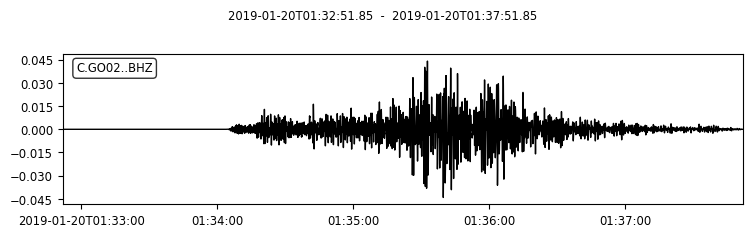

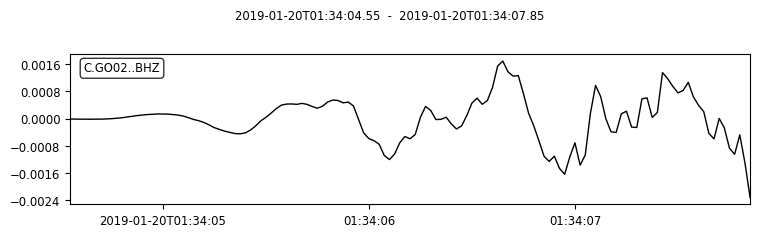

In [34]:
tr= st_C_Z[1].copy()

tr.detrend()
tr.filter('highpass', freq=1.0, corners=2, zerophase=True)
tr.plot();
pre_filt = [0.001, 0.005, 45, 50]
tr.remove_response(inventory=inv_C, pre_filt=pre_filt, output="DISP") 
tr.filter('highpass', freq=1.0, corners=2, zerophase=True)
tr.plot();
tr.data=tr.data*1000
tr.plot();
tr.plot(starttime=t+72.7,endtime=t+76);
tr.slice(starttime=t+72.7,endtime=t+76);
Pd = max(abs(tr.data))

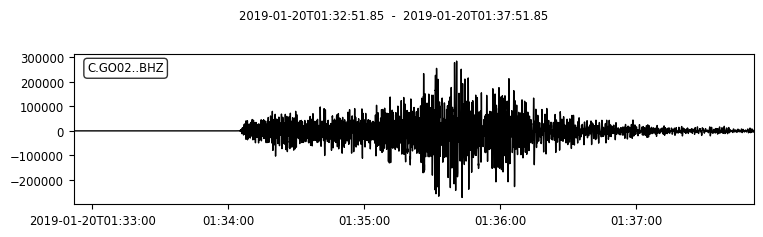

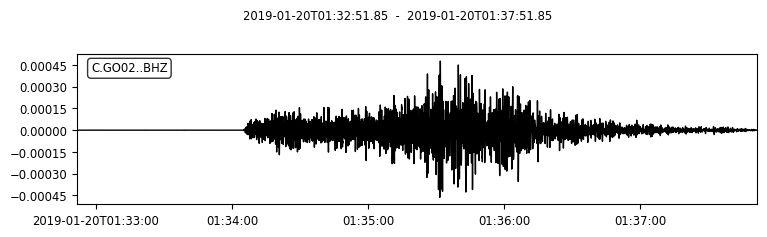

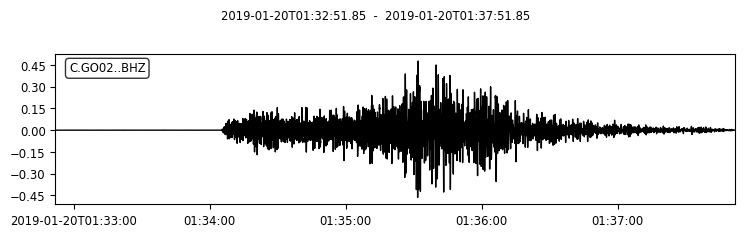

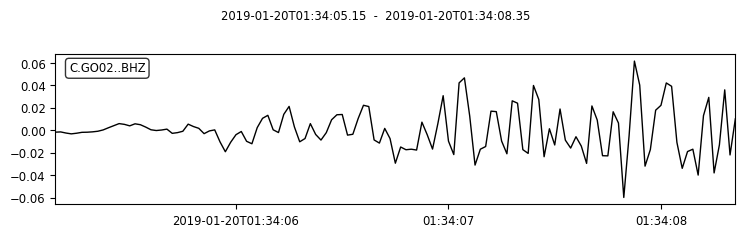

In [35]:
tr= st_C_Z[1].copy()

tr.detrend()
tr.filter('highpass', freq=1.0, corners=2, zerophase=True)
tr.plot();
pre_filt = [0.001, 0.005, 45, 50]
tr.remove_response(inventory=inv_C, pre_filt=pre_filt, output="VEL") 
tr.filter('highpass', freq=1.0, corners=2, zerophase=True)
tr.plot();
tr.data=tr.data*1000
tr.plot();
tr.plot(starttime=t+73.3,endtime=t+76.5);
tr.slice(starttime=t+73.3,endtime=t+76.5);
PGV_true = max(abs(tr.data))

In [36]:
print(f"真實PGV為 {PGV_true}")
print(f"Pd為 {Pd}")
print(f"理論PGV為 {10**(0.920*np.log10(Pd) +1.642)}")
print(f"真實intensity為 {int(round(2.14*np.log10(PGV_true)+1.89))}")
print(f"理論intensity為 {int(round(2.14*np.log10(10**(0.920*np.log10(Pd) +1.642))+1.89))}")

真實PGV為 0.47624243427386964
Pd為 0.04413815901629672
理論PGV為 2.484443231634995
真實intensity為 1
理論intensity為 3


----------------------------------------------

In [39]:
C_lon

-72.077797

In [40]:
E_lon

-71.4202

In [41]:
C_lat

-36.603001

In [42]:
E_lat

-30.071

In [48]:
from obspy.clients.iris import Client
client = Client()
result = client.distaz(stalat=C_lat, stalon=C_lon, evtlat=E_lat,
                       evtlon=E_lon)

In [49]:
result["distance"]

6.5465

In [50]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")

In [52]:
arrivals = model.get_travel_times(source_depth_in_km=54.82,
                                  distance_in_degree=result["distance"],phase_list=["P"])
print(arrivals) 

1 arrivals
	P phase arrival at 93.643 seconds
